In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Set dataset flag: 'mnist' or 'cifar10 or fashionmnist'
dataset_name = 'fashionmnist'  # Change to 'mnist'or cifar10 or fashionmnist if needed
# CIFAR-10 class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# FashionMNIST class labels
fashionmnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
# Load and preprocess dataset
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True
elif dataset_name == 'cifar10':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    input_shape = (32, 32, 3)
    num_classes = 10
    grayscale = False
elif dataset_name == 'fashionmnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

In [16]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    # Removed the last MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7084 - loss: 0.7800 - val_accuracy: 0.8629 - val_loss: 0.3802
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8702 - loss: 0.3539 - val_accuracy: 0.8695 - val_loss: 0.3628
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8929 - loss: 0.2923 - val_accuracy: 0.8857 - val_loss: 0.3138
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9076 - loss: 0.2527 - val_accuracy: 0.8961 - val_loss: 0.2850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9137 - loss: 0.2306 - val_accuracy: 0.8935 - val_loss: 0.2975


In [19]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9183 - loss: 0.2155 - val_accuracy: 0.9058 - val_loss: 0.2592
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9272 - loss: 0.1978 - val_accuracy: 0.9121 - val_loss: 0.2495
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9327 - loss: 0.1811 - val_accuracy: 0.9072 - val_loss: 0.2674
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9380 - loss: 0.1659 - val_accuracy: 0.9019 - val_loss: 0.2727
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9399 - loss: 0.1614 - val_accuracy: 0.9105 - val_loss: 0.2617
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9461 - loss: 0.1470 - val_accuracy: 0.9089 - val_loss: 0.2767
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9464 - loss: 0.1407 - val_accuracy: 0.9119 - val_loss: 0.2698
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9533 - loss: 0.126

In [11]:
# Compile and train using GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

NameError: name 'model' is not defined

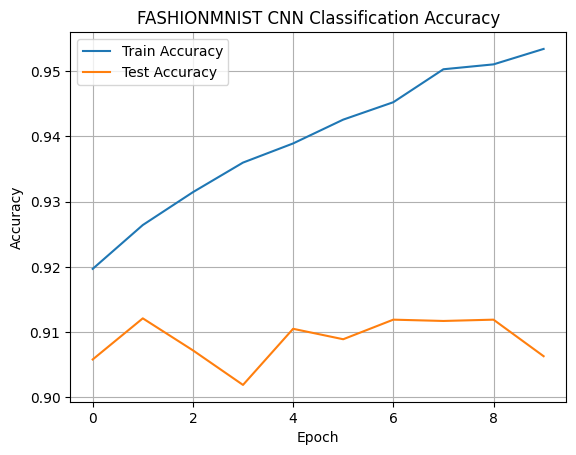

In [20]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_name.upper()} CNN Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


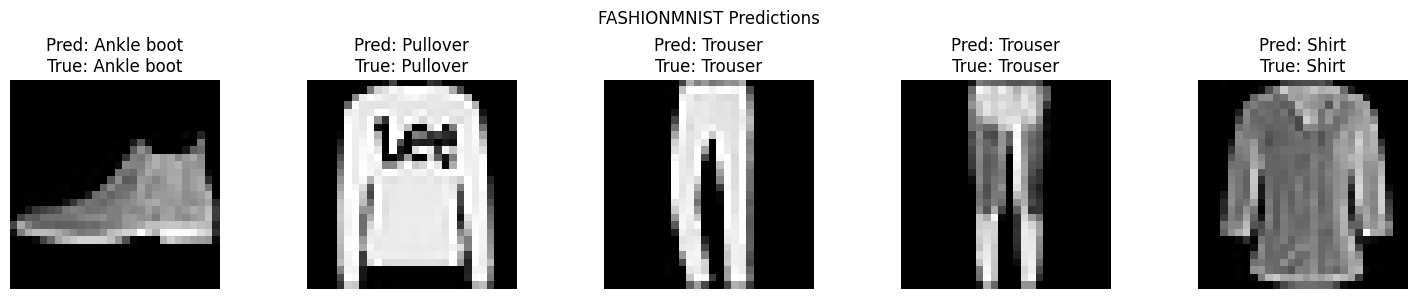

In [22]:
#Display & Predict Images
# ----------------------------

num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    image = X_test[i]
    label = y_test[i]
    prediction = model.predict(image.reshape(1, *input_shape))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_images, i + 1)
    if grayscale:
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        plt.imshow(image)

    if dataset_name == 'fashionmnist':
        pred_name = fashionmnist_labels[predicted_label]
        true_name = fashionmnist_labels[label]
        plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    else:
        plt.title(f"Pred: {predicted_label}\nTrue: {label}")
    plt.axis('off')

plt.suptitle(f'{dataset_name.upper()} Predictions')
plt.tight_layout()
plt.show()
